# Poisson Probability Distributions

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Learning Objectives

After studying this notebook, completing the activities, engaging in class, and reading the book, you should be able to:

* Model scientific and engineering problems using the Poisson distribution.

The Bernoulli distribution considers a single experiment with two outcomes: "success" or "failure". The parameter $p$ encoded the probability of success.

We often write $X \sim$ Bernoulli($p$), which means random variable $X$ follows the Bernoulli distribution with parameter $p$.

Thus the probability mass function is:

Failure: $p(0) = P(X = 0) = 1 - p$
Success: $p(1) = P(X = 1) = p$

Using the definitions for mean and variance:

$$\mu_X = \sum_x x p(x)$$

$$\sigma_X^2 = \sum_x (x - \mu)^2 p(x)$$

it is easy to show $\mu_X = p$ and $\sigma_X^2 = p(1-p)$ for the Bernoulli distribution.

<div style="background-color: rgba(255,0,0,0.05) ; padding: 10px; border: 1px solid darkred;"> 
<b>Study Activity</b>: Derive the mean and variance for the Bernoulli distribution.
</div>

The binomial distribution considers repeated "success" or "failure" experiments.

If a total of $n$ Bernoulli trials are conducted, and
* The trials are independent
* Each trial has the same success probability $p$
* $X$ is the number of successes in the $n$ trials

then $X$ has (follows) the binomial distribution with parameters $n$ and $p$, denoted $X \sim $ Bin($n,p$).

The binomial distribution as the probability mass function

$$p(x) = P(X = x) = \begin{cases}
               \frac{n!}{x!(n-x)!} p^x (1-p)^{n-x} & x=0,1,...,n\\
               0 & \mathrm{otherwise}
            \end{cases}$$

Recall how to count combinations $n$ choose $x$:
    
$${n \choose x} = \frac{n!}{x!(n-x)!}$$

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Explain to your neighbor the three parts of the binomial PMF. Why does it make sense one of these parts counts combinations?
</div>

Using the definition for mean and variance and the binomial PMF, one derived the following formulae:

$$\mu_x = n p$$

$$\sigma_{X}^2 = np(1-p)$$

### Flipping Three Coins

Let's start by enumerating all three possible outcomes for flipping 3 coins.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Study the code below. At this point in the semester, we will only walk through Python examples like the one below if there are questions. When you do your at home preparation, be sure to write down your questions in this notebook.
</div>

In [1]:
def enumerate_coin_flips(n,LOUD=True):
    '''Enumerate all possible outcomes of n coin flips
    
    Arg:
        n: number of coins to flip
        LOUD: print each flip to the screen
        
    Returns:
        summary: dictionary with value: number of heads (successes) and key: fraction of outcomes
    '''
    
    # set counter to 0
    i = 0
    
    # calculate number of total outcomes
    total = 2**n
    
    # initialize dictionary
    summary = {}
    for j in range(n+1):
        summary[j] = 0
    
    # start with all tails
    outcome = [False for j in range(n)]
    
    if LOUD:
        print("Enumerating all outcomes for",n,"flips of a fair coin.")
    
    while i < total:
        if LOUD:
            print(outcome)
        
        # count number of heads (Trues)
        num_heads = sum(outcome)
        
        # record in dictionary
        summary[num_heads] += 1
        
        # increment to next outcome
        keep_going = True
        k = 0
        while keep_going and k < n:
            # flip element k
            if outcome[k] is False:
                # flipped from False to True. We can stop.
                outcome[k] = True
                keep_going = False
            else:
                # flipped from True to False. We need to flip the next position too.
                outcome[k] = False
                k += 1
        
        # increment counter
        i += 1
    
    if LOUD:
        print(total," total outcomes")
    
    # normalize counts stored in `summary` by `total`
    for j in range(n+1):
        summary[j] = summary[j] / total
        
    return summary

In [2]:
enumerate_coin_flips(3)

Enumerating all outcomes for 3 flips of a fair coin.
[False, False, False]
[True, False, False]
[False, True, False]
[True, True, False]
[False, False, True]
[True, False, True]
[False, True, True]
[True, True, True]
8  total outcomes


{0: 0.125, 1: 0.375, 2: 0.375, 3: 0.125}

Notice our function `enumrate_coin_flips` returned a dictionary with the frequency of 0, 1, 2, and 3 heads. Let's see if the PMF for the binomial distribution matches these results.

In [3]:
import math

def nCr(n,r):
    ''' Calculates n choose r
    Args:
        n : total number of items to choose from
        r : number of items to choose
    
    Return:
        Total number of combinations, calculated with factorial formula
    
    '''
    f = math.factorial
    # Note: Using integer division, //, prevents overflow errors in Python 3
    return f(n) // f(r) // f(n-r)

def flip_coins(n,k,p):
    ''' Calculate probability of getting k heads in n coin flips
    n: total number of coin flips
    k: number of heads
    p: probability of success (head) for each event (coin flip)
    '''
    
    assert k <= n
    assert p <= 1.0
    assert p >= 0.0
    
    return nCr(n,k) * p**k * (1-p)**(n - k)

Let's test our function:
* Flip 3 coins
* Interested in the outcome of exactly 2 heads
* Let's use a fair coin: 50% chance for head or tails

In [4]:
flip_coins(3,2,0.5)

0.375

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Compute the probability of exactly 1 head when flipping 3 unfair coins that have a 70% chance of heads. Store your answer as a float in the Python variable <tt>ans_16d_1</tt>.
</div>

In [5]:
### BEGIN SOLUTION
ans_16d_1 = flip_coins(3,1,0.7)
print(ans_16d_1)
### END SOLUTION

0.18900000000000003


In [6]:
### BEGIN HIDDEN TESTS
import numpy as np
assert np.abs(ans_16d_1 - 0.189) < 1E-2, "Try again."
### END HIDDEN TESTS

Now let's plot the probability mass function.

In [7]:
n = 10
p = 0.5
num_heads = []
prob = []
for k in range(n+1):
    num_heads.append(k)
    prob.append(flip_coins(n,k,p))
    
import matplotlib.pyplot as plt
plt.bar(num_heads,prob)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.title("PMF for " + str(n) + " coin flips with p=" + str(p))
plt.show()

<Figure size 640x480 with 1 Axes>

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write a sentence to predict how the PMF will change with an unfair coin that is more likely to land heads than tails.
</div>

**Home Activity Answer:** 

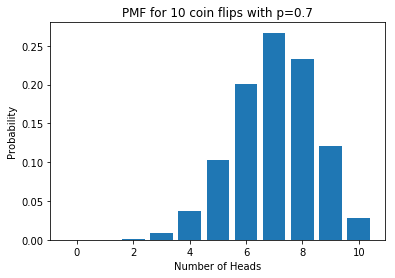

In [8]:
n = 10
p = 0.7
num_heads = []
prob = []
for k in range(n+1):
    num_heads.append(k)
    prob.append(flip_coins(n,k,p))
    
import matplotlib.pyplot as plt
plt.bar(num_heads,prob)
plt.xlabel("Number of Heads")
plt.ylabel("Probability")
plt.title("PMF for " + str(n) + " coin flips with p=" + str(p))
plt.show()

Now let's use `num_heads` and `prob` from the previous code to plot the **cumulative distribution function** (CDF).

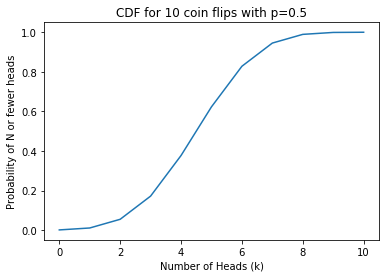

In [9]:
import numpy as np

# Reevaluate the PMF for a fair coin
n = 10
p = 0.5
num_heads = []
prob = []
for k in range(n+1):
    num_heads.append(k)
    prob.append(flip_coins(n,k,p))

# calculate cumulative sum
prob_cum_sum = np.cumsum(prob)

# Create the plot
import matplotlib.pyplot as plt
plt.plot(num_heads,prob_cum_sum)
plt.xlabel("Number of Heads (k)")
plt.ylabel("Probability of N or fewer heads")
plt.title("CDF for " + str(n) + " coin flips with p=" + str(p))
plt.show()

## Poisson Distribution

**Further Reading**: §4.3 in Navidi (2015)

The Poisson distribution is important for modeling rare events including failures and radioactive decay.

If $X \sim$ Poisson($\lambda$), then:
* $X$ is a discrete random variable whose possible values are the non-negative integers ($x$ is unbounded)
* The parameter $\lambda$ is a positive constant
* The probability mass function is
 $$p(x) = P(X = x) = \begin{cases}
               e^{-\lambda} \frac{\lambda^x}{x!} & \text{if } x \text{ is a non-negative integer} \\
               0 & \mathrm{otherwise}
            \end{cases}$$
* The Poisson probability mass function is very close to the binomial probability mass function when $n$ is large, $p$ is small, and $\lambda = n p$.
* The mean is $\mu_X = \lambda$
* The variance is $\sigma_X^2 = \lambda$.

Alright, those are nice properties, but how to specify $\lambda$? Often the Poisson distribution is used to model the number of rare events during a fixed duration. In this context, $\lambda$ is the expected number of rare events. Let's look at an example.

### Example: Failure Rates

Consider a flood occurs on a specific river once every 100 years. Calculate the probability 0, 1, 2, ..., 6 floods occur in the next 100 years. Assume the Poisson distribution accurately models flooding on this river.

Step 0: Identify $\lambda$

We are modeling floods, which are a rare event. The fixed duration is 100 years. We expect 1 flood every 100 years, so $\lambda = 1$.

Step 1: Write a function to evaluate the PDF

In [11]:
def poisson(k,lmb):
    ''' PMF for Poisson distribution
    Args:
        k: number of events
        lmb: average number of events per interval
    Return:
        probability of k events occuring during interval
    '''
    
    assert k >= 0
    assert lmb >= 0
    
    return np.exp(-lmb) * lmb**k / math.factorial(k)

Step 2: Test out function for 10 floods

In [12]:
poisson(10,1)

1.0137771196302975e-07

Step 3: Answer the question asked

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Evaluate the probabilities of 0 to 6 floods during the next 100 years. Store your answer as a numpy array <tt>p_floods</tt> such that <tt>p_floods[3]</tt> is the probability of 3 floods.
</div>

In [13]:
n_floods = range(0,7)
p_floods = np.zeros(7)

### BEGIN SOLUTION
for i in n_floods:
    p_floods[i] = poisson(i,1)
    
print(p_floods)
### END SOLUTION

[0.36787944 0.36787944 0.18393972 0.06131324 0.01532831 0.00306566
 0.00051094]


In [14]:
### BEGIN HIDDEN TESTS
secret_ans = [0.36787944, 0.36787944, 0.18393972, 0.06131324, 0.01532831, 0.00306566, 0.00051094]

for i in n_floods:
    assert np.abs(p_floods[i] - secret_ans[i]) < 1E-2, "Check your answer for "+str(i)+" floods."
### END HIDDEN TESTS

Using our results, we can plot the probability mass function and cumulative density function:

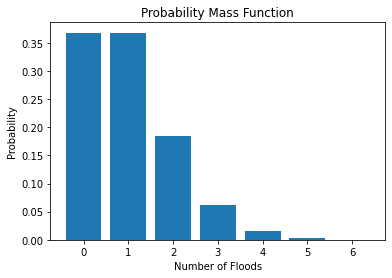

In [15]:
plt.bar(n_floods,p_floods)
plt.xlabel("Number of Floods")
plt.ylabel("Probability")
plt.title("Probability Mass Function")
plt.show()

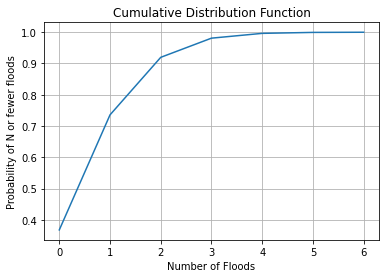

In [16]:
# calculate cumulative sum
cum_p_floods = np.cumsum(p_floods)

# Create the plot
plt.plot(n_floods,cum_p_floods)
plt.xlabel("Number of Floods")
plt.ylabel("Probability of N or fewer floods")
plt.grid(True)
plt.title("Cumulative Distribution Function")
plt.show()

The normal distribution (a.k.a. Gaussian) is a good model for many continuous random variables in science and engineering. As we will soon see, the normal distributions is also extremely important in statistics.

Here is the probability density function:

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2 / (2\sigma^2)}
$$

The normal distribution is charactered by two parameters, $\mu$ and $\sigma$, which are the mean and standard deviation:

$$
\mu_X = \int_{-\infty}^{\infty} x \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2 / (2\sigma^2)} dx = \mu
$$

$$
\sigma^2_X = \int_{-\infty}^{\infty} (x - \mu_X)^2 \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2 / (2\sigma^2)} dx = \sigma^2
$$

Navidi (2015) walks through the calculus on pg. 251 and 252.

We write $X \sim \mathcal{N}(\mu, \sigma^2)$.

### 95-97-99.7 Rule

Here is how to **draw a normal distribution** on paper.
1. Draw a symmetric "bell" curve.
2. Label the peak $\mu$.
3. Label the points of inflection $\mu - \sigma$ and $\mu + \sigma$.
4. $\sigma$ is the distance between the peak and the points of inflection. Using this distance, label $\mu \pm 2 \sigma$ and $\mu \pm 3 \sigma$.

![normal distribution](https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png)

As alluded to a few times this semester, there is not an analytic expression for integrating the normal PDF. Instead, we must use numeric integration. Most engineers, scientists, and statisticians memorize three specific areas under the normal curve, which is called the **68-95-99.7 rule**.

$$\int_{\mu - \sigma}^{\mu + \sigma} \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2 / (2\sigma^2)} dx \approx 0.6827$$

$$\int_{\mu - 2 \sigma}^{\mu + 2 \sigma} \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2 / (2\sigma^2)} dx \approx 0.9545$$

$$\int_{\mu - 3 \sigma}^{\mu + 3 \sigma} \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2 / (2\sigma^2)} dx \approx 0.9973$$

### Standardization

Let $X \sim \mathcal{N}(\mu, \sigma^2)$. It is much more convienent to standardize by defining a new variable $Z$:

$$Z = \frac{X - \mu}{\sigma}$$

Now let's convert the three integrals for the 68-95-99.7 rule from $x$ to $z$. First, let's solve for $x$.

$$z = \frac{x - \mu}{\sigma} \rightarrow x = z \sigma + \mu$$

Recall the **normal PDF**:

$$f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2 / (2\sigma^2)}$$

Now substitute:

$$f(z) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(z\sigma + \mu -\mu)^2 / (2\sigma^2)}$$

And simplify:

$$f(z) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-z^2 / 2}$$

Now let's transform the **limits of integration**:

$$x = \mu + c \sigma$$

Now substitute:

$$z \sigma + \mu = \mu + c \sigma$$

And simplify:

$$z = c$$

Now let's **transform the $dx$ into a $dz$**. First we differentiate:

$$\sigma dz = dx$$

And then subsitutite:

$$\int_{\mu - c \sigma}^{\mu + c \sigma} \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x-\mu)^2 / (2\sigma^2)} dx = \int_{-c}^{c} \frac{1}{\sqrt{2 \pi}} e^{-z^2 / 2} dz$$

We see that $Z$ follows a normal distribution with mean 0 and variance 1, i.e., $Z \sim \mathcal{N}(0, 1)$. This is known as a **standard normal distribution**.

The front cover of your textbook has precomputed the cumulative distribution function for the standard normal. This is known as a **z-table**.

![z-table](https://cdn1.byjus.com/wp-content/uploads/2017/09/word-image.png)

### Example: Using the Z-Table

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Use the Z-table to answer the following questions.
</div>

As an intern at Frozen Pizza, Inc. you learn the fat content of single serving pies is normally distributed with mean 10g with standard deviation 0.2 g.

#### What is the probability the next pizza coming off the manufacturing line has more than 10.4 grams of fat?

#### The FDA would like you to certify that 99% of frozen pizzas have fat content between $\underline{\qquad \qquad}$ and $\underline{\qquad \qquad}$ grams, where the interval in centered at the mean. Fill in the blanks.

### Example: Modeling Stocks

Let's say we want to predict the outcome of the stock market next year. We create a simple model using a normal distribution with mean 1.5% return and standard deviation 4.5% return.

According to our model, is the probability we will lose money next year if we invest in the stock market?

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Work through the example below together.
</div>

#### Approach 1: Numerical integrate the pdf

In [16]:
from scipy import integrate
def normal_pdf(x,mean,stdev):
    '''PDF for normal distribution
    Arg:
        x: outcome value
        mean: mean
        stdev: standard deviation
    
    Return: probability    
    '''
    
    assert stdev > 0.0
    
    var = stdev**2
    
    return (1/np.sqrt(2*np.pi*var)) * np.exp(-(x - mean)**2 / 2 / var)

# Integrate numerically. We'll learn the details of how this works later in the class.

my_f = lambda x: normal_pdf(x, mean=1.5, stdev=4.5)

integrate.quad(my_f,-10000,0)

(0.36944134018176356, 5.073409550679581e-12)

#### Approach 2: Standardize and use function for standard normal distribution

In [17]:
z = (0 - 1.5) / 4.5
print(z)

-0.3333333333333333


In [18]:
from scipy import stats
stats.norm.cdf(z)

0.36944134018176367